# All the imported packages listed here:

In [1]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.datasets import load_iris
from scipy.io import loadmat
from sklearn import tree

## Ex. 1 Split train-test dataset

In [2]:

print(boston.keys())
print(boston.data.shape)
print(boston.DESCR)
#reshufling the data
X, y = shuffle(boston.data, boston.target, random_state=22)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
   

In [3]:
bos = pd.DataFrame(X)
print(bos.head())

        0    1      2    3      4      5     6       7    8      9     10  \
0  0.06076  0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
1  0.06642  0.0   4.05  0.0  0.510  6.860  74.4  2.9153  5.0  296.0  16.6   
2  0.27957  0.0   9.69  0.0  0.585  5.926  42.6  2.3817  6.0  391.0  19.2   
3  0.62356  0.0   6.20  1.0  0.507  6.879  77.7  3.2721  8.0  307.0  17.4   
4  0.77299  0.0   8.14  0.0  0.538  6.495  94.4  4.4547  4.0  307.0  21.0   

       11     12  
0  396.90   5.64  
1  391.27   6.92  
2  396.90  13.59  
3  390.39   9.93  
4  387.94  12.80  


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
#splitting the data

### Checking the spread of values:

In [5]:

print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


# Ex. 2 Linear regression

In [6]:

linreg = LinearRegression().fit(X_train, y_train)
Y_pred = linreg.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

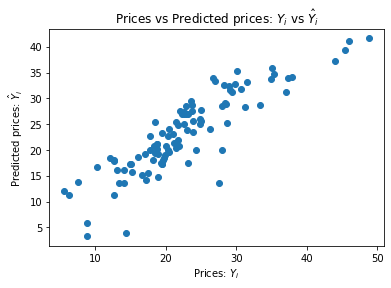

In [7]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

# Ex. 3: To check the level of error of a model calculate the Mean Squared Error.

In [8]:
print(linreg.score(X_test, y_test),"\n",np.mean((y_test - Y_pred)**2))

0.7631260067419332 
 16.148756536519983


# Ex. 4: Calculate the model.score. Check what it is for linear problems. 

In [9]:
scaler = StandardScaler()
polynomial_features = PolynomialFeatures(degree=2)
pipeline = make_pipeline(scaler, polynomial_features, linreg)
pipeline.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=55)
Y_pred = pipeline.predict(X_test)
print("PipelineScore method error:")
print(pipeline.score(X_test, y_test),"\n") 
print("Mean square error of all data: ")
print(np.mean((y_test - Y_pred)**2))

PipelineScore method error:
0.9308628611382366 

Mean square error of all data: 
4.713387095618482


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

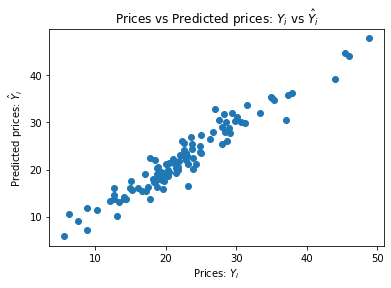

In [10]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

# Ex. 5 Lasso

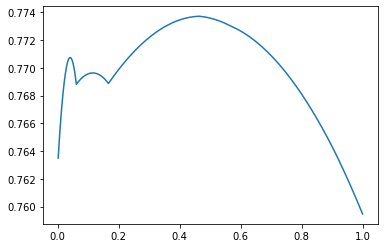

In [11]:

alpha_space = np.linspace(0.001, 1.0, 10000)

scores = []
for alpha in alpha_space:
    L1 = Lasso(alpha=alpha)
    L1.fit(X_train, y_train)
    Y_pred = L1.predict(X_test)
    score = L1.score(X_test, y_test)
    scores.append(score)
plt.plot(alpha_space,scores)


 ## ^^^ The highest socre is for values of approximately alpha = 0.47

# Ex. 6 Ridge regression

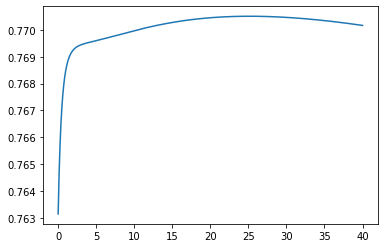

In [12]:
alpha_space = np.linspace(0.001, 40, 1000)
scores = []
for alpha in alpha_space:
    L2 = Ridge(alpha=alpha)
    L2.fit(X_train, y_train)
    Y_pred = L2.predict(X_test)
    score = L2.score(X_test, y_test)
    scores.append(score)
plt.plot(alpha_space,scores)

## ^^^ The highest socre is for values of approximately alpha = 26

# Regularization for logistic regression:

In [13]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# Ex. 1: Using function .isnull() check wether the database contains missing values.
# Please fill the missing values with mean values for giving class.

In [ ]:
print(data.data.shape[0],data.data.shape[1],data.target.shape[0])

## Concatening the data with classes, in order to divide into classes of having/not having cancer. 

### To fill the null values with means of columns with regard to respective classes:

In [14]:
data.target=data.target.reshape((data.target.shape[0],1))
data_new=np.hstack((data.data, data.target))
print(data_new)
print(data_new.shape[0],data_new.shape[1])

569 30 569
[[1.799e+01 1.038e+01 1.228e+02 ... 4.601e-01 1.189e-01 0.000e+00]
 [2.057e+01 1.777e+01 1.329e+02 ... 2.750e-01 8.902e-02 0.000e+00]
 [1.969e+01 2.125e+01 1.300e+02 ... 3.613e-01 8.758e-02 0.000e+00]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 2.218e-01 7.820e-02 0.000e+00]
 [2.060e+01 2.933e+01 1.401e+02 ... 4.087e-01 1.240e-01 0.000e+00]
 [7.760e+00 2.454e+01 4.792e+01 ... 2.871e-01 7.039e-02 1.000e+00]]
569 31


In [15]:
df = pd.DataFrame(data_new)
print(df.isnull())
#splitting the data by class
df1 = df[df[30] == 0]
df2 = df[df[30] == 1]


        0      1      2      3      4      5      6      7      8      9   \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
564  False  False  False  False  False  False  False  False  False  False   
565  False  False  False  False  False  False  False  False  False  False   
566  False  False  False  False  False  False  False  False  False  False   
567  False  False  False  False  False  False  False  False  False  False   
568  False  False  False  False  False  False  False  False  False  False   

     ...     21     22     23     24     25     26     27     28     29    

In [16]:
# Filling the null values with mean of columns
df1=df1.fillna(df1.mean())
df2=df2.fillna(df2.mean())
# Concatening the data back together
df=pd.concat([df2, df1])
print(df.shape[0],df1.shape[0],df2.shape[0])
print(df)

569 212 357
         0      1       2       3        4        5        6         7   \
19   13.540  14.36   87.46   566.3  0.09779  0.08129  0.06664  0.047810   
20   13.080  15.71   85.63   520.0  0.10750  0.12700  0.04568  0.031100   
21    9.504  12.44   60.34   273.9  0.10240  0.06492  0.02956  0.020760   
37   13.030  18.42   82.61   523.8  0.08983  0.03766  0.02562  0.029230   
46    8.196  16.84   51.71   201.9  0.08600  0.05943  0.01588  0.005917   
..      ...    ...     ...     ...      ...      ...      ...       ...   
563  20.920  25.09  143.00  1347.0  0.10990  0.22360  0.31740  0.147400   
564  21.560  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.138900   
565  20.130  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.097910   
566  16.600  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.053020   
567  20.600  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.152000   

         8        9   ...     21      22      23       24       25       26  \
19   0.1

In [17]:
# Resetting index
df.reset_index(drop=True, inplace=True)
# target value is now at column 31, remaining 30 is the data.
X, y = shuffle(df.loc[:, 0:29], df.loc[:,30], random_state=22)
print(X,y)

        0      1       2       3        4        5         6         7   \
123  12.89  14.11   84.95   512.2  0.08760  0.13460  0.137400  0.039800   
30   13.27  14.76   84.74   551.7  0.07355  0.05055  0.032610  0.026480   
370  15.85  23.95  103.70   782.7  0.08401  0.10020  0.099380  0.053640   
262  11.99  24.89   77.61   441.3  0.10300  0.09218  0.054410  0.042740   
89   10.08  15.11   63.76   317.5  0.09267  0.04695  0.001597  0.002404   
..     ...    ...     ...     ...      ...      ...       ...       ...   
491  17.35  23.06  111.00   933.1  0.08662  0.06290  0.028910  0.028370   
502  11.76  18.14   75.00   431.1  0.09968  0.05914  0.026850  0.035150   
358  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.086900  0.070170   
356   7.76  24.54   47.92   181.0  0.05263  0.04362  0.000000  0.000000   
132  11.29  13.04   72.23   388.0  0.09834  0.07608  0.032650  0.027550   

         8        9   ...      20     21      22      23       24       25  \
123  0.1596  0.06409 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55) # Splitting 

In [19]:
logreg = LogisticRegression(solver='liblinear',penalty = 'l1', C=1) 
#liblinear solver allows Lasso regularization ^ we are specifying for what method the penalty is applied (Lasso)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print("score =",score,"\n")
print("mean squared error =",np.mean((y_test - Y_pred)**2))

score = 0.9736842105263158 

mean squared error = 0.02631578947368421


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.9210526315789473, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544]
plot of accuracy by C values


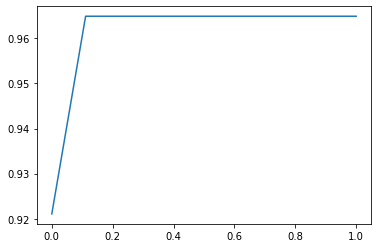

In [20]:
C_space = np.linspace(0.0001, 1.0, 10)

scores = []
for C in C_space:
    logreg = LogisticRegression(solver='liblinear',penalty = 'l2', C=C)
    logreg.fit(X_train, y_train)
    Y_pred = logreg.predict(X_test)
    score = logreg.score(X_test, y_test)
    scores.append(score)
plt.plot(C_space,scores)
print(scores)
print("plot of accuracy by C values")

# Best for approximately 0.013 penalty value.

[0.9777777777777777, 0.9333333333333333, 0.9777777777777777, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9111111111111111, 0.9111111111111111, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.9111111111111111, 0.8888888888888888, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.8666666666666667, 0.9111111111111111, 0.8666666666666667, 0.8888888888888888, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8444444444444444, 0.8666666666666667, 0.8444444444444444]


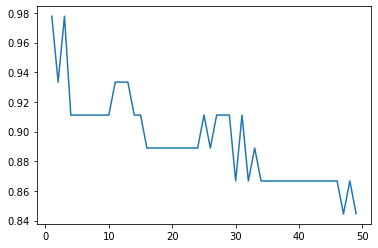

In [21]:
db_iris = datasets.load_iris()
 
X_train, X_test, y_train, y_test = train_test_split(db_iris.data, db_iris.target, test_size=0.3, random_state=88)
ks=[]
scores=[]
k_space=range(1,50) 
for k in k_space: # Varying the amount of neighbors to see the effect on the dataset.
    knn = KNeighborsClassifier(n_neighbors=k);
    knn.fit(X_train, y_train);
    Y_pred = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    scores.append(score)
    ks.append(k)
plt.plot(k_space,scores)
print(scores)

# Seeking for the optimal k value:

In [22]:
result=[list(k_space), scores]
result=np.array(result)

result = result[:,result[1,:].argsort()]

result = result[:,result[1,:].argmax()]
#print(result)
k_optimal = result[0]#[0,:]
#k_optimal = k_optimal[k_optimal.argsort()]
#result=np.append(k_space, scores,axis=0)

print("optymalne k =\n",k_optimal)

optymalne k =
 3.0


[0.5777777777777777, 0.9333333333333333, 0.9333333333333333, 0.8666666666666667, 0.9111111111111111, 0.9333333333333333, 0.9333333333333333, 0.9777777777777777, 0.8888888888888888, 0.8888888888888888, 0.9777777777777777, 0.9333333333333333, 0.8888888888888888, 0.9777777777777777, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.9333333333333333, 0.8888888888888888, 0.9333333333333333, 0.9333333333333333, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.9777777777777777, 0.9333333333333333, 0.9333333333333333, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.9333333333333333, 0.8888888888888888, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.9333333333333333, 0.8888888888888888, 0.8888888888888888, 0.9333333333333333, 0.8888888888888888, 0.9333333333333333, 0.9333333333333333]
optymalne głębokośc

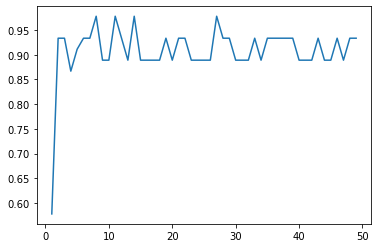

In [23]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(db_iris.data, db_iris.target, test_size=0.3, random_state=88)
deps=[]
scores=[]
dep_space=range(1,50)
for dep in dep_space: # Seeking for the optimal depth of decision tree.
    clf = tree.DecisionTreeClassifier(max_depth=dep);
    clf.fit(X_train, y_train);
    Y_pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    scores.append(score)
    deps.append(dep)
plt.plot(dep_space,scores)
print(scores)

result=[list(dep_space), scores]
result=np.array(result)

result = result[:,result[1,:].argsort()]
result = result[:,result[1,:].argmax()]

dep_optimal = result[0]


print("optymalne głębokości =\n",dep_optimal)



# However, the 8 value is less, and fits the data with the same accuracy.